<a href="https://colab.research.google.com/github/mace0202/python_2024_08_12/blob/main/%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install ultralytics opencv-python-headless matplotlib

from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))

!mkdir -p /content/sample_data
!mv {filename} /content/sample_data/{filename}

Saving 1.jpg to 1.jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 272MB/s]



image 1/1 /content/sample_data/1.jpg: 448x640 4 persons, 2 cars, 4 motorcycles, 1 bus, 1 truck, 1 traffic light, 379.0ms
Speed: 15.1ms preprocess, 379.0ms inference, 27.3ms postprocess per image at shape (1, 3, 448, 640)


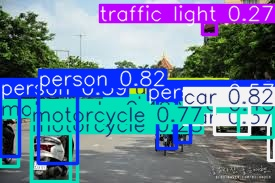

In [8]:
from ultralytics import YOLO
from IPython.display import Image, display
model = YOLO('yolov8n.pt')
image_path = '/content/sample_data/1.jpg'
results = model.predict(image_path)
first_result = results[0]
first_result.save()
saved_image_path = '/content/results_1.jpg'
display(Image(saved_image_path))

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# 이미지 캡처
image_path = take_photo() # 'photo.jpg' 파일에 이미지 저장

<IPython.core.display.Javascript object>